# Finding K in K-Means

So when applying K-Means Clustring, one comes at a point where he/she has to decide how many cluster they want, now one can not go and tell 2,3, or 4 clusters there should be a some evidence that clustering the data into *'k'* clusters will yeild good results. So I met this problem, after searching for what can be done about this problem I stumble upon a something called **'Silhouette Analysis'**

### Silhouette Analysis

Silhouette Analysis takes into considration of how well a particular data point lies within a given cluster. So lets take an example to understand how this works, Say we are using K-Means Clustring for *'k'* number of clusters. Now for a data point *'i'*, we define average distance from all points in the same cluster as *avg(i) = a(i)*, so we can interpret *a(i)* as measure of how well that point belongs in the cluster or to put it simply how well that point belongs in that cluster, so smaller the value, better the assignment of that data point to that cluster. Similarly, lets say *b(i)* is the average dissimlarity, that means *b(i)* the lowest average distance of data point *i*  to all points in any other cluster, of which *i* is not a member of. The cluster with this lowest average dissimilarity is said to be the "neighbouring cluster" of *i* because it is the next best fit cluster for point *i*

In [1]:
from IPython.display import Math
Math(r's(i) = \frac{b(i)-a(i)}{max(b(i),a(i))}')

<IPython.core.display.Math object>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [21]:
import pickle 

with open('/home/jay/class-level-docs.pkl', 'rb') as docs:
    class_docs =pickle.load(docs)
    
with open('/home/jay/class-level-label.pkl', 'rb') as labs:
    class_label = pickle.load(labs)

In [22]:
class_label

['employment_and_social_policy',
 'audiovisual_and_media',
 'institutional_affairs',
 'enlargement',
 'customs',
 'enterprise',
 'internal_market',
 'humanitarian_aid',
 'justice_freedom_security',
 'energy',
 'consumers',
 'maritime_affairs_and_fisheries',
 'foreign_and_security_policy',
 'information_society',
 'education_training_youth',
 'human_rights',
 'external_relations',
 'development',
 'agriculture',
 'food_safety',
 'fight_against_fraud',
 'economic_and_monetary_affairs',
 'competition',
 'transport',
 'culture',
 'environment',
 'public_health',
 'taxation',
 'regional_policy',
 'external_trade',
 'research_innovation',
 'budget']

In [29]:
# running the k-means for 32 clusters
# creating tf-idf matrix

tfidf_matrix_constructor = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, ngram_range=(1,3))

tfidf_matrix = tfidf_matrix_constructor.fit_transform(class_docs)

# printing the shape of the resultant matrix to ensure I am right
print(tfidf_matrix.shape)

(32, 200000)


In [ ]:
with open('/home/jay/k-find/pickles/tf-idf-class-level.pkl', 'wb') as tf:
    pickle.dump(tfidf_matrix, tf)

In [4]:
# now applying k-means for range 1-32 and calculating silhouette_score for each cluster

for k in range(2 ,33):
    
    # define k-means constructor
    kmeans = KMeans(n_clusters=k,random_state=10)
    
    cluster_labels = kmeans.fit_predict(tfidf_matrix.toarray())
    
    # Calculating silhouette_score for k
    
    score = silhouette_score(tfidf_matrix.toarray(), cluster_labels, random_state=10)
    print("The silhouette score for {} clusters is {}".format(k,score))

The silhouette score for 2 clusters is 0.5044159597205802
The silhouette score for 3 clusters is 0.5377674475595976
The silhouette score for 4 clusters is 0.5428150072050602
The silhouette score for 5 clusters is 0.5675084132188464
The silhouette score for 6 clusters is 0.5583472230011157
The silhouette score for 7 clusters is 0.557273945756692
The silhouette score for 8 clusters is 0.5789109648812476
The silhouette score for 9 clusters is 0.6061132289742661
The silhouette score for 10 clusters is 0.6201850630464807
The silhouette score for 11 clusters is 0.6130083777211174
The silhouette score for 12 clusters is 0.6004463052048459
The silhouette score for 13 clusters is 0.5802146625551772
The silhouette score for 14 clusters is 0.5578174584974451
The silhouette score for 15 clusters is 0.5455435385700866
The silhouette score for 16 clusters is 0.5074028524441978
The silhouette score for 17 clusters is 0.49496006806149984
The silhouette score for 18 clusters is 0.46543110264186144
The 

In [9]:
# The elbow analysis 

# define list to store cluster errors

cluster_errors = []

for k in range(1 ,33):
    
    # define k-means constructor
    kmeans = KMeans(n_clusters=k,random_state=10,n_jobs=-1)
    
    cluster_ = kmeans.fit(tfidf_matrix.toarray())
    
    cluster_errors.append(cluster_.inertia_)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
len(cluster_errors)

32

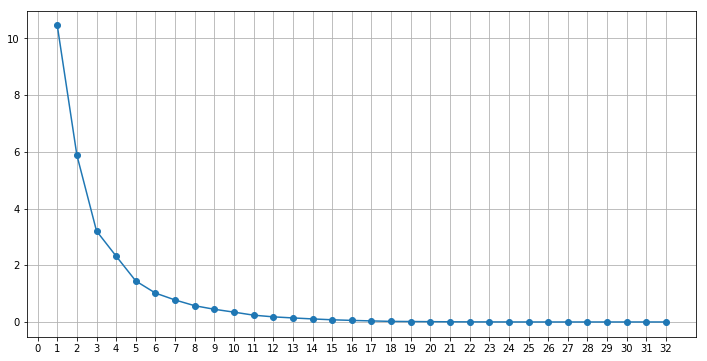

In [12]:
plt.figure(figsize=(12,6))
plt.plot(range(1,33), cluster_errors, marker = "o" )
a=plt.xticks(np.arange(33))
plt.grid()

# Clustering

The first one is based on the silhouette score that gave the number of clusters to be 10, but the clustering is not as good as expected. The distribution of classes doesnt make a lot of sense to to me. 

In [16]:
kmeas = KMeans(n_clusters=10, random_state=10,n_jobs=-1)


In [17]:
cluster_label =kmeas.fit(tfidf_matrix.toarray())

In [28]:
for i, j in zip(class_label, cluster_label.labels_):
    print(i,j)

employment_and_social_policy 1
audiovisual_and_media 1
institutional_affairs 1
enlargement 1
customs 1
enterprise 1
internal_market 1
humanitarian_aid 4
justice_freedom_security 9
energy 7
consumers 7
maritime_affairs_and_fisheries 2
foreign_and_security_policy 2
information_society 2
education_training_youth 6
human_rights 6
external_relations 5
development 5
agriculture 5
food_safety 3
fight_against_fraud 3
economic_and_monetary_affairs 8
competition 8
transport 0
culture 0
environment 0
public_health 0
taxation 0
regional_policy 0
external_trade 0
research_innovation 0
budget 0


In [31]:
Counter(cluster_label.labels_)

Counter({0: 9, 1: 7, 2: 3, 3: 2, 4: 1, 5: 3, 6: 2, 7: 2, 8: 2, 9: 1})

# Clustering Based on Elbow Analysis

The elbow analysis suggested that number of clusters should be between 3 and 5, however it was not clear that what it should be. So performed on 3,4,5. The results are down below. I think 3 cluster for class level clustering makes more sense as there is some sense to it. The cluster of classes itself makes more sense than in 4 and 5

In [32]:
# using elbow score

elbow = KMeans(n_clusters=3, random_state=10,n_jobs=-1)

In [33]:
elbow_model = elbow.fit(tfidf_matrix.toarray())

In [34]:
for i, j in zip(class_label, elbow_model.labels_):
    print(i,j)

employment_and_social_policy 1
audiovisual_and_media 1
institutional_affairs 1
enlargement 1
customs 1
enterprise 1
internal_market 1
humanitarian_aid 1
justice_freedom_security 2
energy 2
consumers 2
maritime_affairs_and_fisheries 2
foreign_and_security_policy 2
information_society 2
education_training_youth 2
human_rights 2
external_relations 2
development 2
agriculture 2
food_safety 0
fight_against_fraud 0
economic_and_monetary_affairs 0
competition 0
transport 0
culture 0
environment 0
public_health 0
taxation 0
regional_policy 0
external_trade 0
research_innovation 0
budget 0


In [35]:
elbow_4 = KMeans(n_clusters=4, random_state=10,n_jobs=-1)
elbow_model_4 = elbow_4.fit(tfidf_matrix.toarray())

In [36]:
for i, j in zip(class_label, elbow_model_4.labels_):
    print(i,j)

employment_and_social_policy 0
audiovisual_and_media 0
institutional_affairs 0
enlargement 0
customs 0
enterprise 0
internal_market 0
humanitarian_aid 0
justice_freedom_security 2
energy 2
consumers 2
maritime_affairs_and_fisheries 2
foreign_and_security_policy 2
information_society 2
education_training_youth 2
human_rights 2
external_relations 1
development 1
agriculture 1
food_safety 1
fight_against_fraud 1
economic_and_monetary_affairs 1
competition 1
transport 3
culture 3
environment 3
public_health 3
taxation 3
regional_policy 3
external_trade 3
research_innovation 3
budget 3


In [37]:
elbow_5 = KMeans(n_clusters=5, random_state=10,n_jobs=-1)
elbow_model_5 = elbow_5.fit(tfidf_matrix.toarray())
for i, j in zip(class_label, elbow_model_5.labels_):
    print(i,j)

employment_and_social_policy 0
audiovisual_and_media 0
institutional_affairs 0
enlargement 0
customs 0
enterprise 0
internal_market 0
humanitarian_aid 4
justice_freedom_security 2
energy 2
consumers 2
maritime_affairs_and_fisheries 2
foreign_and_security_policy 2
information_society 2
education_training_youth 2
human_rights 2
external_relations 1
development 1
agriculture 1
food_safety 1
fight_against_fraud 1
economic_and_monetary_affairs 1
competition 1
transport 3
culture 3
environment 3
public_health 3
taxation 3
regional_policy 3
external_trade 3
research_innovation 3
budget 3
